In [2]:
onedrive = r"C:\Users\mikek\OneDrive"

from boututils.datafile import DataFile
from boutdata.collect import collect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import platform
import traceback
import xarray as xr
import xbout
from pathlib import Path

sys.path.append(os.path.join(onedrive,r"Project\python-packages\sdtools"))

from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *
from code_comparison.code_comparison import *

%load_ext autoreload
%autoreload 2


print("Done")

Done


# Intro
- This is for running test cases on a lo res case from scratch 

In [3]:
store_name = "a4c"

In [4]:
cases = read_file(rf"C:\Users\mikek\OneDrive\Project\collab\tech\notebooks\{store_name}.pkl")
casenames = cases.keys()
print(casenames)

C:\Users\mikek\OneDrive\Project\collab\tech\notebooks\a4c.pkl loaded
dict_keys(['x2-a1-base_500_3e19', 'x2-b2-a1_rtol_1e-4', 'x2-b1-a1_rtol_1e-6', 'x2-b3-a1_rtol_1e-7', 'x2-b4-a1_rtol_1e-8', 'x2-a4-a1_aa_norm_fix', 'x2-a5-a1_time_derivs', 'x2c1-_a4_mxorder_1', 'x2c2-_a4_mxorder_2', 'x2c3-_a4_mxorder_3'])


In [4]:
del cases['x2c3-_a4_mxorder_3']

In [3]:
cases = dict()

In [5]:
db = CaseDB(case_dir = r"C:\Users\mikek\OneDrive\Project\collab\tech\cases")

casenames = [
    "x2-a1-base_500_3e19",
    "x2-b2-a1_rtol_1e-4",
    "x2-b1-a1_rtol_1e-6",
    "x2-b3-a1_rtol_1e-7",
    "x2-b4-a1_rtol_1e-8",
    "x2-a4-a1_aa_norm_fix",
    "x2-a5-a1_time_derivs",
    "x2c1-_a4_mxorder_1",
    "x2c2-_a4_mxorder_2",
    "x2c3-_a4_mxorder_3",   
    "x2d1-_c3_rtol_1e-4",
    "x2d2-_c3_rtol_1e-6",
    "x2d3-_c3_rtol_1e-7",
    "x2d4-_c3_rtol_1e-8",
    "x2d5-_c3_rtol_1e-9" 
    ]

print(f"Loading:")
for name in casenames:
    
    if name not in cases.keys():
        print(f"\n{name}...")
        cases[name] = Load.case_2D(db.casepaths[name], gridfilepath = db.gridpaths["g3b1-lores_newhypno.nc"], keep_boundaries = False)
    else:
        print(f"Skipping {name}...")
    


Loading:
Skipping x2-a1-base_500_3e19...
Skipping x2-b2-a1_rtol_1e-4...
Skipping x2-b1-a1_rtol_1e-6...
Skipping x2-b3-a1_rtol_1e-7...
Skipping x2-b4-a1_rtol_1e-8...
Skipping x2-a4-a1_aa_norm_fix...
Skipping x2-a5-a1_time_derivs...
Skipping x2c1-_a4_mxorder_1...
Skipping x2c2-_a4_mxorder_2...
Skipping x2c3-_a4_mxorder_3...

x2d1-_c3_rtol_1e-4...
--> dx, dy and J will not be unnormalised
CHECK: Total domain volume is 1.032E+00 [m3]

x2d2-_c3_rtol_1e-6...
--> dx, dy and J will not be unnormalised
CHECK: Total domain volume is 1.032E+00 [m3]

x2d3-_c3_rtol_1e-7...
--> dx, dy and J will not be unnormalised
CHECK: Total domain volume is 1.032E+00 [m3]

x2d4-_c3_rtol_1e-8...
--> dx, dy and J will not be unnormalised
CHECK: Total domain volume is 1.032E+00 [m3]

x2d5-_c3_rtol_1e-9...
--> dx, dy and J will not be unnormalised
CHECK: Total domain volume is 1.032E+00 [m3]


In [7]:
write_file(cases, rf"C:\Users\mikek\OneDrive\Project\collab\tech\notebooks\{store_name}.pkl")

C:\Users\mikek\OneDrive\Project\collab\tech\notebooks\a4c.pkl written


In [13]:
casechoice = [
              # "x2-b2-a1_rtol_1e-4", 
              # "x2-a1-base_500_3e19", 
              # "x2-b1-a1_rtol_1e-6", 
              # "x2-b3-a1_rtol_1e-7",
              # "x2-b4-a1_rtol_1e-8",
              # "x2-a4-a1_aa_norm_fix",
            #   "x2-a5-a1_time_derivs",
              # "x2c1-_a4_mxorder_1",
              # "x2c2-_a4_mxorder_2",
              # "x2c3-_a4_mxorder_3",   
              # "x2-a4-a1_aa_norm_fix", 
              
              "x2d1-_c3_rtol_1e-4",
              "x2c3-_a4_mxorder_3",   
              "x2d2-_c3_rtol_1e-6",
              "x2d3-_c3_rtol_1e-7",
              "x2d4-_c3_rtol_1e-8",
              "x2d5-_c3_rtol_1e-9" 
              ]

caselabels = {"x2-b2-a1_rtol_1e-4":"rtol=1e-4", 
              "x2-a1-base_500_3e19":"rtol=1e-5", 
              "x2-b1-a1_rtol_1e-6":"rtol=1e-6", 
              "x2-b3-a1_rtol_1e-7":"rtol=1e-7", 
              "x2-b4-a1_rtol_1e-8":"rtol=1e-8",
              "x2-a4-a1_aa_norm_fix":"aa fix",
              "x2-a5-a1_time_derivs":"aa fix, scale_timederivs",
              "x2c1-_a4_mxorder_1":"mxorder=1",
              "x2c2-_a4_mxorder_2":"mxorder=2",
              "x2c3-_a4_mxorder_3":"mxorder=3",  
              "x2d1-_c3_rtol_1e-4":"mxd=3, atol=1e-4",
              "x2d2-_c3_rtol_1e-6":"mxd=3, atol=1e-6",
              "x2d3-_c3_rtol_1e-7":"mxd=3, atol=1e-7",
              "x2d4-_c3_rtol_1e-8":"mxd=3, atol=1e-8",
              "x2d5-_c3_rtol_1e-9":"mxd=3, atol=1e-9", 
              
              }


In [10]:
for casename in casechoice:
    case = cases[casename]
    avg_ncalls = (case.ds["ncalls"].data[0:-1]/case.ds.coords["t"].diff("t")).mean()
    print(f"Case {casename}: {avg_ncalls:.2e}")


Case x2d1-_c3_rtol_1e-4: 1.27e+08
Case x2-a4-a1_aa_norm_fix: 5.36e+08
Case x2d2-_c3_rtol_1e-6: 2.12e+08
Case x2d3-_c3_rtol_1e-7: 1.43e+08
Case x2d4-_c3_rtol_1e-8: 1.57e+08
Case x2d5-_c3_rtol_1e-9: 1.42e+09


# CVODE Stats

In [260]:
cmap(norm(1))

(0.362553, 0.003243, 0.649245, 1.0)

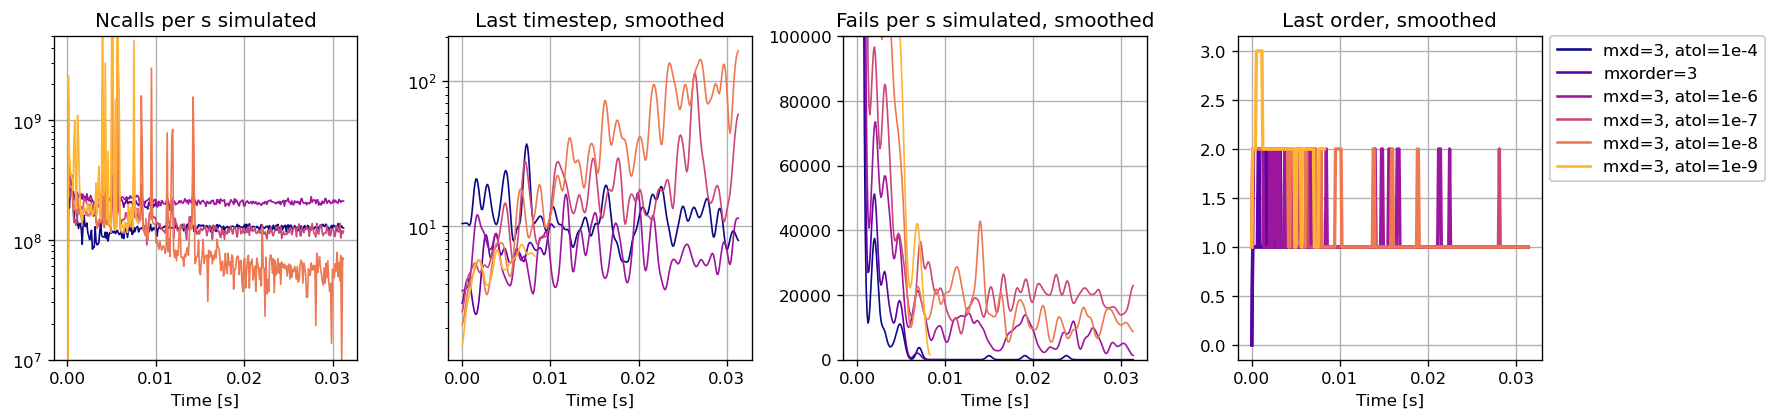

In [21]:
ncols = 4
fig, axes = plt.subplots(1,ncols,figsize=(4*ncols,3.5), dpi = 120)
fig.subplots_adjust(wspace=0.3)
lw = 1
norm = mpl.colors.Normalize(vmin=0, vmax = len(casechoice))
cmap = plt.get_cmap("plasma")

colors = [cmap(norm(x)) for x in range(len(casechoice))]
# cmap = lambda x: mike_cmap()[int(x)]
# colors = [mike_cmap()[x] for x in range(len(casechoice))]

for i, name in enumerate(casechoice):
    case = cases[name]

    ax = axes[0]
    ncalls_per_timestep = (case.ds["ncalls"].data[0:-1]/case.ds.coords["t"].diff("t"))
    ax.plot(case.ds.coords["t"][0:-1], ncalls_per_timestep,  lw = lw, ls = "-", label = caselabels[name], c = colors[i])
    ax.set_ylim(1e7,5e9)
    ax.set_yscale("log")
    ax.set_title("Ncalls per s simulated")
    
    ax = axes[1]
    ax.plot(case.ds.coords["t"], scipy.ndimage.gaussian_filter1d(case.ds["cvode_last_step"], 3),  lw = lw, ls = "-", label = caselabels[name], c = colors[i])
    ax.set_yscale("log")
    ax.set_title("Last timestep, smoothed")
    
    ax = axes[2]
    ax.plot(case.ds.coords["t"], scipy.ndimage.gaussian_filter1d(np.gradient(case.ds["cvode_num_fails"], case.ds.coords["t"]),3),  lw = lw, ls = "-", label = caselabels[name], c = colors[i])
    # ax.set_yscale("log")
    ax.set_ylim(0,0.1e6)
    ax.set_title("Fails per s simulated, smoothed")
    # ax.plot(case.ds.coords["t"][:-1], np.diff(case.ds.data_vars["cvode_nsteps"].data), c = mike_cmap()[i], label = "nsteps")
    
    ax = axes[3]
    ax.plot(case.ds.coords["t"], scipy.ndimage.gaussian_filter1d(case.ds["cvode_last_order"],1),  lw = lw+1, ls = "-", label = caselabels[name], c = colors[i])
    # ax.set_yscale("log")
    # ax.set_ylim(0,0.1e6)
    ax.set_title("Last order, smoothed")
    # ax.plot(case.ds.coords["t"][:-1], np.diff(case.ds.data_vars["cvode_nsteps"].data), c = mike_cmap()[i], label = "nsteps")
    
    legend = []
    for j, name in enumerate(casechoice):
        legend.append(mpl.lines.Line2D([0], [0], c = colors[j]))
        
    fig.legend(legend, [caselabels[x] for x in casechoice], loc="upper left", bbox_to_anchor=(0.9,0.9))
    
for ax in axes:
    ax.set_xlabel("Time [s]")
    ax.grid()


In [229]:
df.index

Index(['rtol=1e-4', 'rtol=1e-5', 'rtol=1e-6', 'rtol=1e-7', 'rtol=1e-8',
       'aa fix', 'aa fix, scale_timederivs', 'mxorder=1', 'mxorder=2',
       'mxorder=3'],
      dtype='object')

,avg_ncalls
"mxd=3, atol=1e-4",13308.0
mxorder=3,22418.0
"mxd=3, atol=1e-6",22110.0
"mxd=3, atol=1e-7",14908.0
"mxd=3, atol=1e-8",16313.0
"mxd=3, atol=1e-9",146301.0


Text(0.5, 1.0, 'Case slowness')

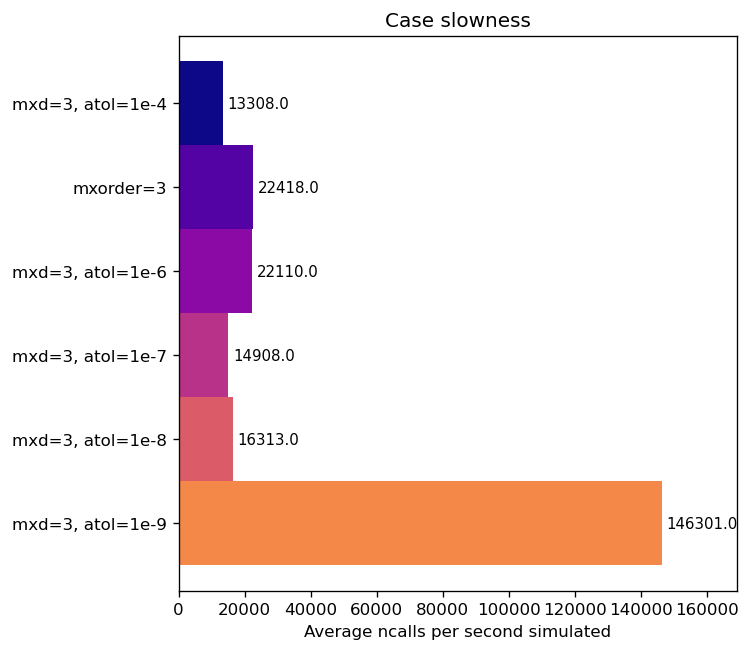

In [15]:
df = pd.DataFrame()
colors = [mike_cmap()[x] for x in range(len(casechoice))]
norm = mpl.colors.Normalize(vmin=0, vmax = len(casechoice)+1)
cmap = lambda x: mike_cmap()[int(x)]

cmap = plt.get_cmap("plasma")
colors = [cmap(norm(x)) for x in range(len(casechoice))]

# colors [cmap[x] for x in range(len(casechoice))]

for casename in casechoice:
    case = cases[casename]
    ncalls_per_timestep = (case.ds["ncalls"].data[0:-1]/case.ds.coords["t"].diff("t"))
    df.loc[caselabels[casename], "avg_ncalls"] = case.ds["ncalls"].data.mean().round(0)
    

w = 0.25
x =  np.array(range(len(df.columns)))
fig, ax = plt.subplots(figsize = (6,6), dpi=120)

for i, name in enumerate(df.index):
    norm_data = df.loc[name].values / df.loc[name].values.max()
    
    bars = ax.barh(x + w*i, height = w, width = df.loc[name].values, label = name, color = colors[i], alpha = 1)
    ax.bar_label(bars, labels = df.loc[name].values, padding = 3, fontsize = 9)
    
ax.set_yticks([(x + w*i)[0] for i in range(len(df.index))], df.index)
ax.set_xlim(None,ax.get_xlim()[1]*1.1)
ax.invert_yaxis()
# ax.legend(loc="upper left", bbox_to_anchor=(1,1))
ax.set_xlabel("Average ncalls per second simulated")
display(df)
ax.set_title("Case slowness")

In [244]:
[(x + w*i)[0] for i in range(len(df.index))]

[0.0, 0.25, 0.5, 0.75, 1.0]

x2d1-_c3_rtol_1e-4


c:\Users\mikek\anaconda3\lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
c:\Users\mikek\anaconda3\lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


x2c3-_a4_mxorder_3


c:\Users\mikek\anaconda3\lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
c:\Users\mikek\anaconda3\lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


x2d2-_c3_rtol_1e-6


c:\Users\mikek\anaconda3\lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
c:\Users\mikek\anaconda3\lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


x2d3-_c3_rtol_1e-7


c:\Users\mikek\anaconda3\lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
c:\Users\mikek\anaconda3\lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


x2d4-_c3_rtol_1e-8


c:\Users\mikek\anaconda3\lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
c:\Users\mikek\anaconda3\lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


x2d5-_c3_rtol_1e-9


c:\Users\mikek\anaconda3\lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
c:\Users\mikek\anaconda3\lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


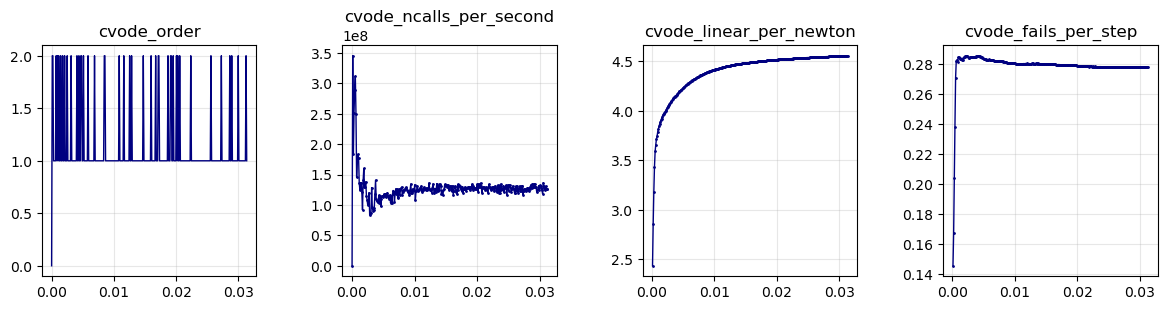

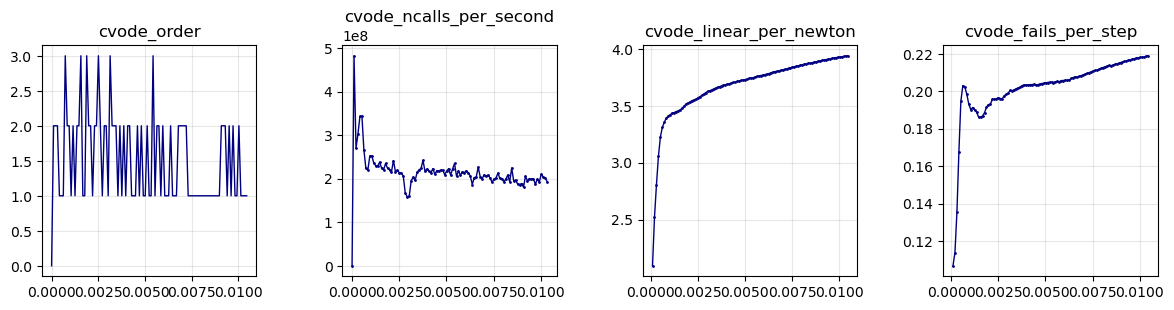

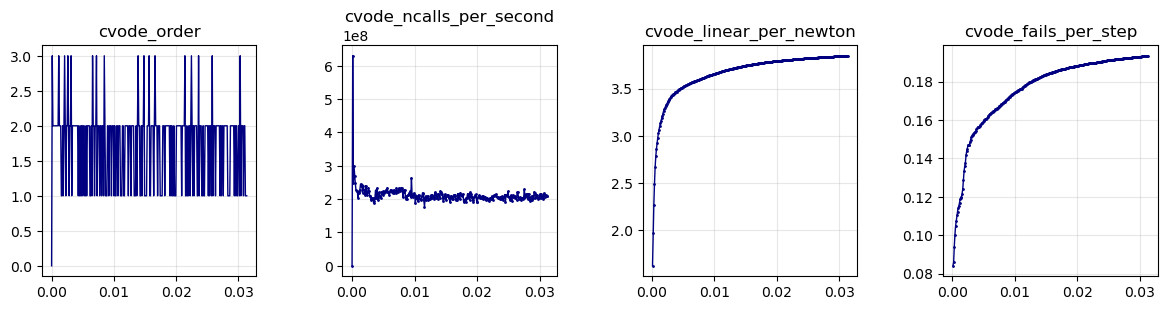

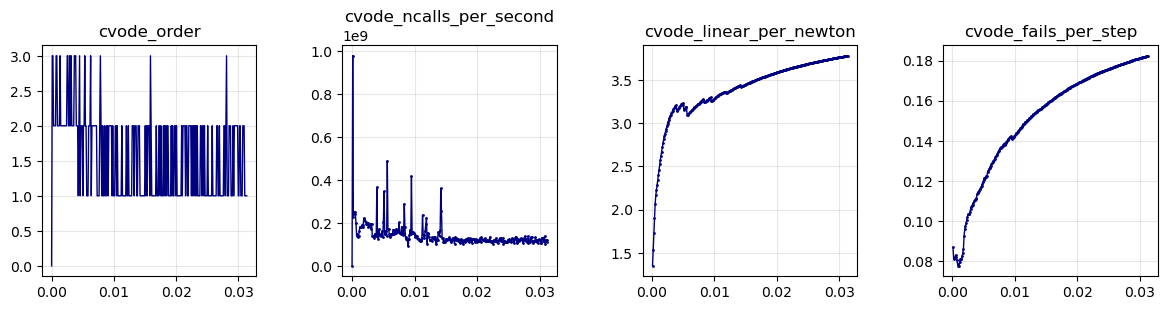

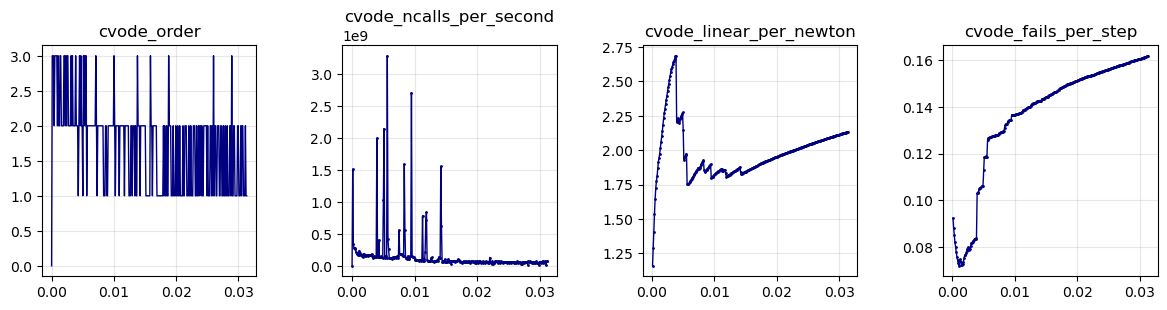

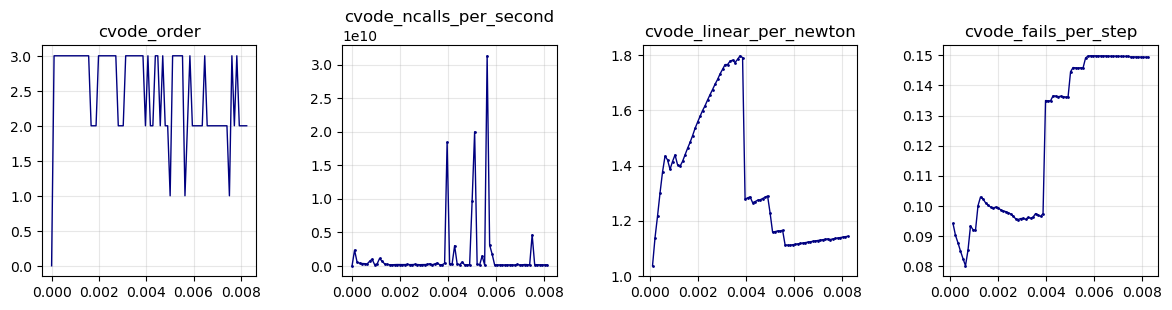

In [16]:
for i, name in enumerate(casechoice):
    print(name)
    case = cases[name]
    Monitor(case, [
            #    ["cvode_order", "ncalls_per_timestep", "cvode_evals", "cvode_fails"],
               ["cvode_order","cvode_ncalls_per_second", "cvode_linear_per_newton","cvode_fails_per_step"]
               ])

# Seam fluctuations

Text(0.5, 1.0, 'Seam fluctuation control')

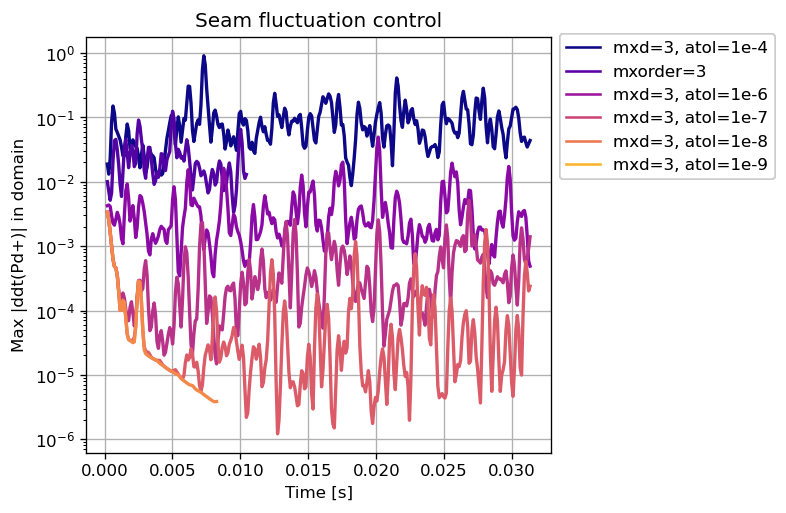

In [17]:
ncols = 1
fig, axes = plt.subplots(1,ncols,figsize=(5*ncols,4.5), dpi = 120)
fig.subplots_adjust(wspace=0.3)
lw = 2
norm = mpl.colors.Normalize(vmin=0, vmax = len(casechoice))


for i, name in enumerate(casechoice):
    case = cases[name]

    data = abs(case.ds["ddt(Pd+)"]).max(axis=(1,2))
    
    ax = axes
    ax.plot(case.ds.coords["t"][2:], scipy.ndimage.gaussian_filter1d(data[2:],1), lw = lw, label = name, color = colors[i])
    ax.set_yscale("log")
    
    legend = []
    for j, name in enumerate(casechoice):
        legend.append(mpl.lines.Line2D([0], [0], c = cmap(norm(j))))
        
    fig.legend(legend, [caselabels[x] for x in casechoice], loc="upper left", bbox_to_anchor=(0.9,0.9))
    

ax.grid()
ax.set_xlabel("Time [s]")
ax.set_ylabel("Max |ddt(Pd+)| in domain")
ax.set_title("Seam fluctuation control")


    # rms = np.sqrt((data**2).sum("t") / len(data.coords["t"]))
    
    

## Difference in profiles

In [32]:
casechoice

['x2-a1-base_500_3e19',
 'x2-b2-a1_rtol_1e-4',
 'x2-b1-a1_rtol_1e-6',
 'x2-a4-a1_aa_norm_fix',
 'x2-a5-a1_time_derivs']

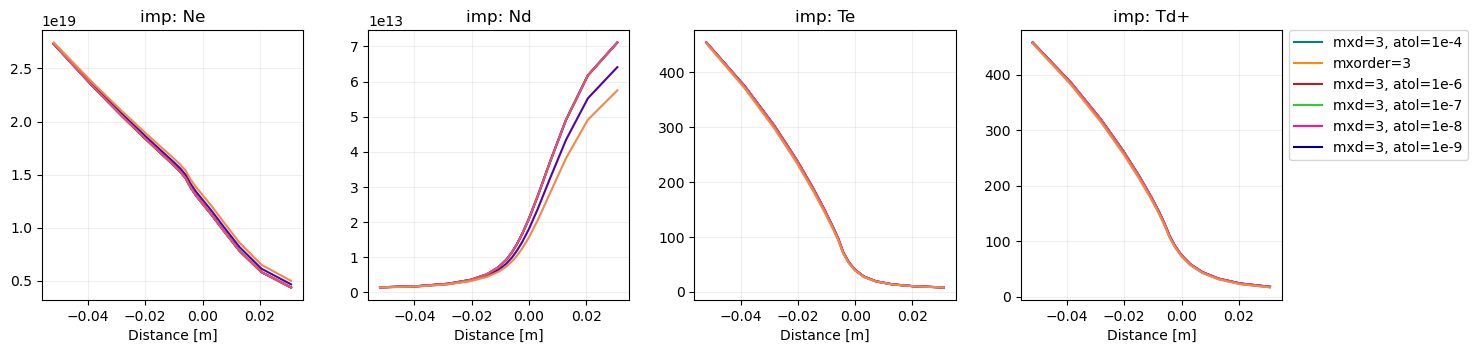

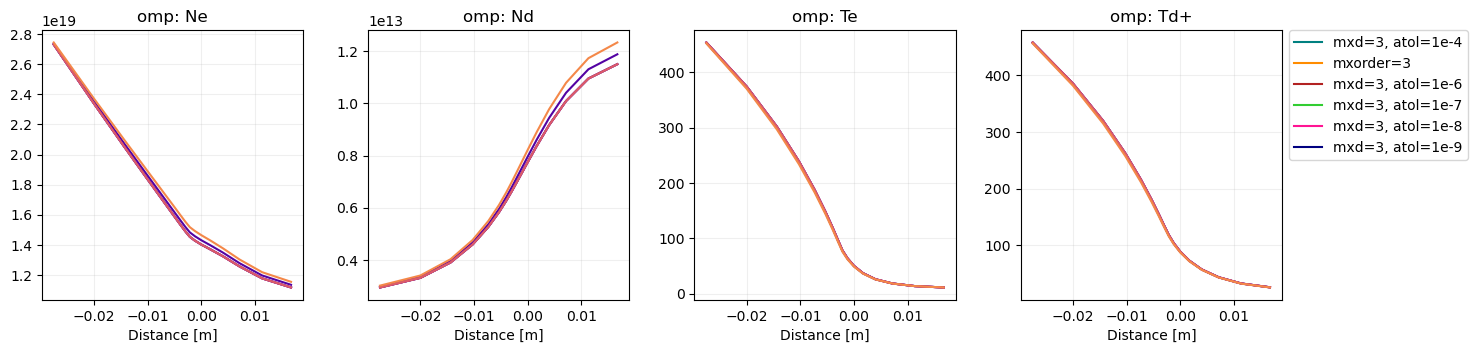

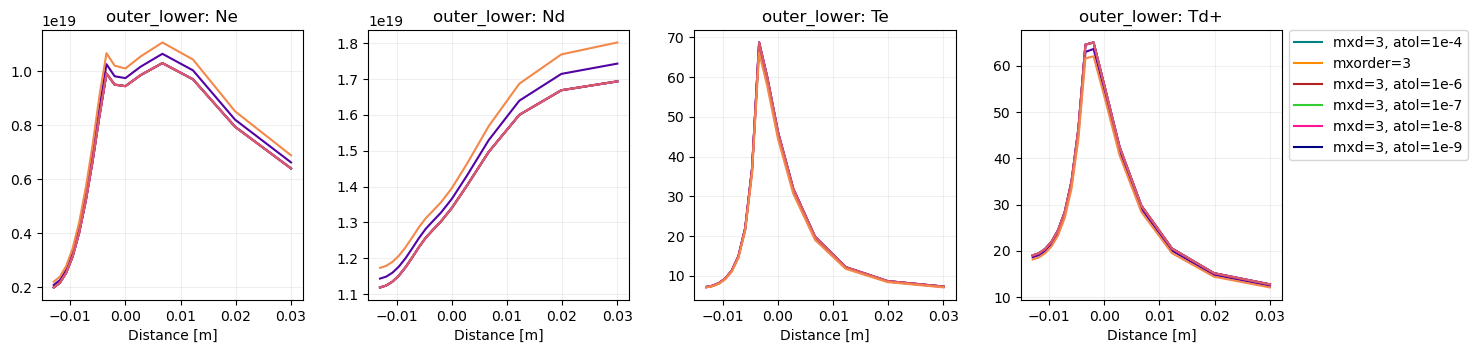

In [18]:
compare = dict()

for i, name in enumerate(casechoice):
    compare[name] = Hermesdata()
    compare[name].read_case(cases[name])
    
list_params = ["Ne", "Nd", "Te", "Td+"]
list_regions = ["imp", "omp", "outer_lower"]

cols = len(list_params)
marker = "o"
ms = 0
lw = 1.5

for region in ["imp", "omp", "outer_lower"]:
    
    fig, axes = plt.subplots(1,cols, dpi = 100, figsize = (4*cols,3.5*1))
    fig.subplots_adjust(hspace = 0.35, wspace = 0.25)
    labels = [None] * len(cases.keys())

    
    for i, param in enumerate(list_params):
        for j, name in enumerate(casechoice):
            if region in compare[name].regions.keys():
                data = compare[name].regions[region]
                if param in data.columns:
                    axes[i].plot(data.index, data[param],  c = colors[j], marker = marker, ms = ms, lw = lw)
                
        # axes[i].set_yscale(set_yscales[region][param])
        # if set_ylims[region][param] != (None, None):
        #     axes[i].set_ylim(set_ylims[region][param])
        # axes[i].set_xlim(None, 0.05)
        axes[i].grid(which="both", alpha = 0.2)
        axes[i].set_xlabel("Distance [m]")
        
        axes[i].set_title(f"{region}: {param}")
        
    legend = []
    for j, name in enumerate(casechoice):
        legend.append(mpl.lines.Line2D([0], [0], color = mike_cmap()[j]))
        
    fig.legend(legend, [caselabels[x] for x in casechoice], loc="upper left", bbox_to_anchor=(0.9,0.9))

In [35]:
casenames

['x2-a1-base_500_3e19',
 'x2-b2-a1_rtol_1e-4',
 'x2-b1-a1_rtol_1e-6',
 'x2-a4-a1_aa_norm_fix',
 'x2-a5-a1_time_derivs']

c:\Users\mikek\anaconda3\lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


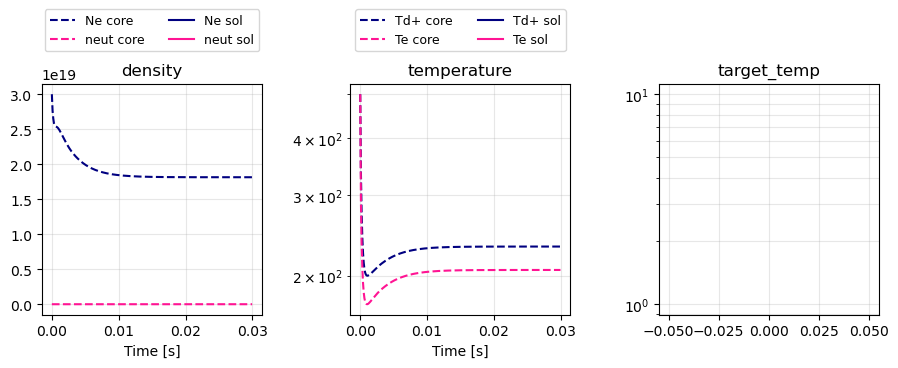

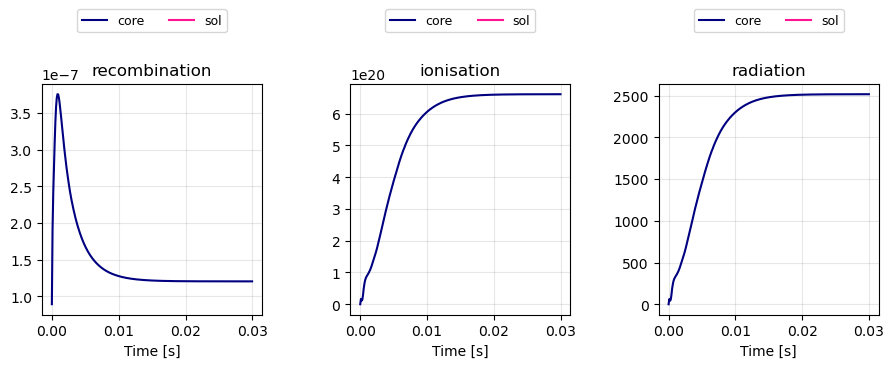

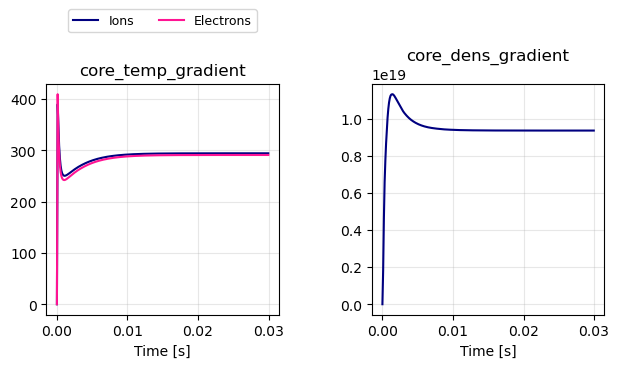

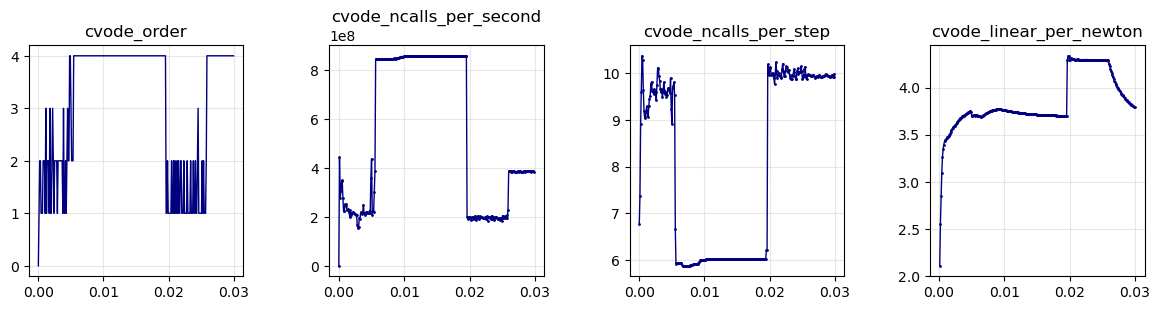

In [203]:
case = cases[casechoice[0]]

Monitor(case, [["density", "temperature","target_temp"],
               ["recombination", "ionisation", "radiation"],
               ["core_temp_gradient", "core_dens_gradient"],
               ["cvode_order", "cvode_ncalls_per_second", "cvode_ncalls_per_step", "cvode_linear_per_newton"],
               ])

In [198]:
%matplotlib qt

In [199]:
fig, axes = plt.subplots(figsize = (8,5), dpi = 100)
self = cases[casechoice[1]]
anim = xbout.plotting.animate.animate_poloidal(abs(self.ds["Ne"]), ax = axes, cmap = "Spectral_r", vmin = 1e18, vmax = 1e19, logscale = False, color = "k", linewidth = 0)

In [200]:
%matplotlib inline

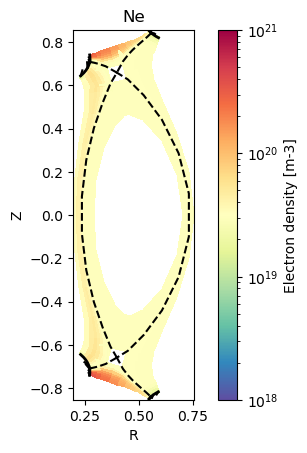

In [202]:
self.ds.isel(t=-1)["Ne"].bout.pcolormesh(cmap = "Spectral_r", vmin = 1e18, vmax = 1e21,logscale = True)
print()

x2-a1-base_500_3e19
{'xlim': (None, None), 'ylim': (None, 0), 'figure_aspect': 0.5, 'wspace_modifier': 1, 'view': 'lower_divertor', 'dpi': 150}
x2-a4-a1_aa_norm_fix
{'xlim': (None, None), 'ylim': (None, 0), 'figure_aspect': 0.5, 'wspace_modifier': 1, 'view': 'lower_divertor', 'dpi': 150}


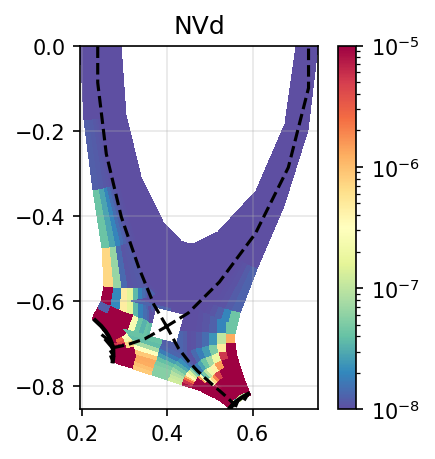

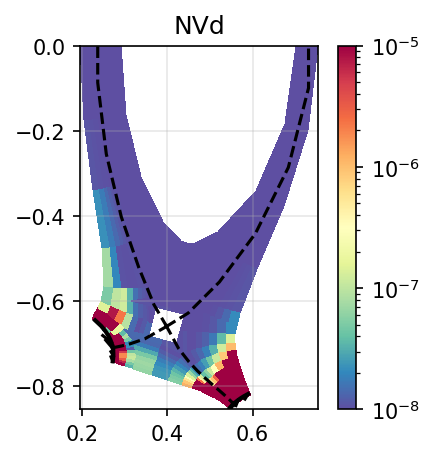

In [33]:
for casename in casechoice:
  print(casename)
  self = Monitor2D(cases[casename], mode = "pcolor", windows = [[
    # "Ne", 
    # "Nd", 
    "NVd",
    # "Dnnd",
    ]], 
                  settings = {
                      "all":{"view":"lower_divertor", "dpi": 150},
                      "Ne":{"vmin":None, "vmax":None},
                    #   "Te":{"log":True, "vmin":10, "vmax":100},
                    #   "Td+":{"log":True, "vmin":10, "vmax":100},
                      "Nd":{"log": True, "vmin":1e13, "vmax":1e18},
                      "NVd":{"vmin":1e-8, "vmax":1e-5},
                      "Dnnd":{"log": False, "vmin":None, "vmax":None},
                      })

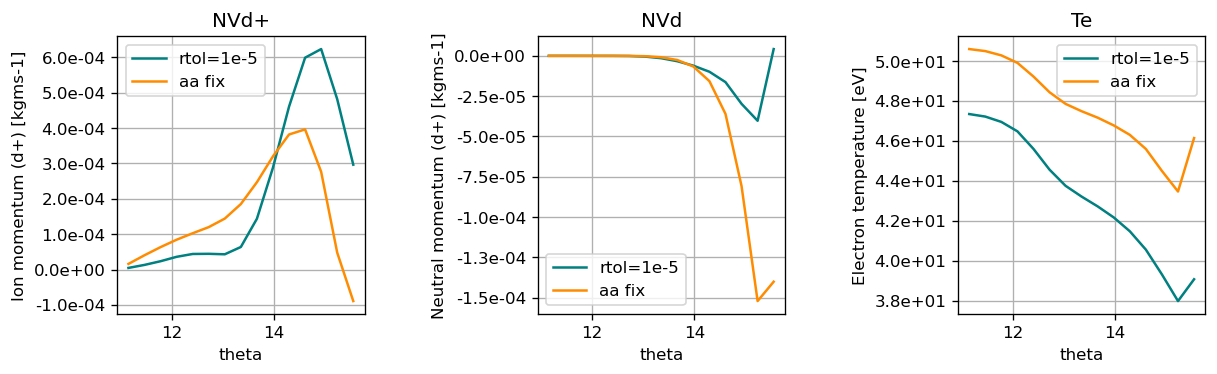

In [26]:
ncols = 3
size = 3
fig, axes = plt.subplots(1,ncols,figsize=(size*ncols*1.3,size), dpi = 120)
fig.subplots_adjust(wspace = 0.7)
lw = 1

for i, casename in enumerate(casechoice):
    case = cases[casename]
    fl = case.select_custom_sol_ring(0, "outer_lower").isel(t=-1)
    
    param = "NVd+"
    ax = axes[0]
    fl[param].plot(ax = ax, label = caselabels[casename], c = mike_cmap()[i])
    ax.set_title(param)
    
    param = "NVd"
    ax = axes[1]
    fl[param].plot(ax = ax, label = caselabels[casename], c = mike_cmap()[i])
    ax.set_title(param)
    
    param = "Te"
    ax = axes[2]
    fl[param].plot(ax = ax, label = caselabels[casename], c = mike_cmap()[i])
    ax.set_title(param)
    
    
for ax in axes:
    ax.grid()
    ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter("{x:.1e}"))
    ax.legend()
    

In [27]:
%matplotlib qt

In [30]:
fig, ax = plt.subplots(figsize = (3,6), dpi = 150)


cases[casechoice[0]].ds["NVd+"].isel(t=-1).bout.pcolormesh(cmap = "PuOr", ax = ax, logscale = True, )
print()

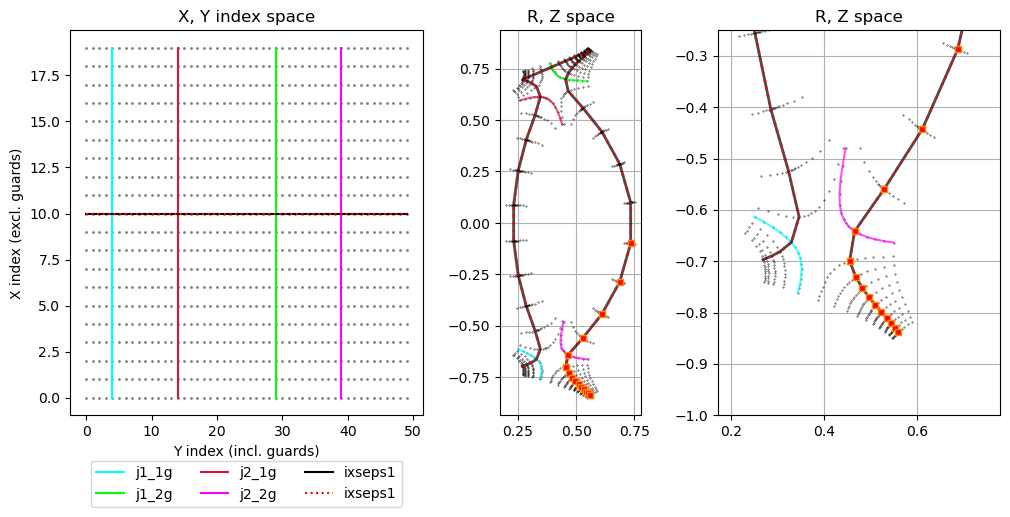

In [22]:
plot_selection(case, case.select_custom_sol_ring(0, "outer_lower"))

{'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9, 'wspace_modifier': 1, 'view': None, 'dpi': 100}
None
10
10
None


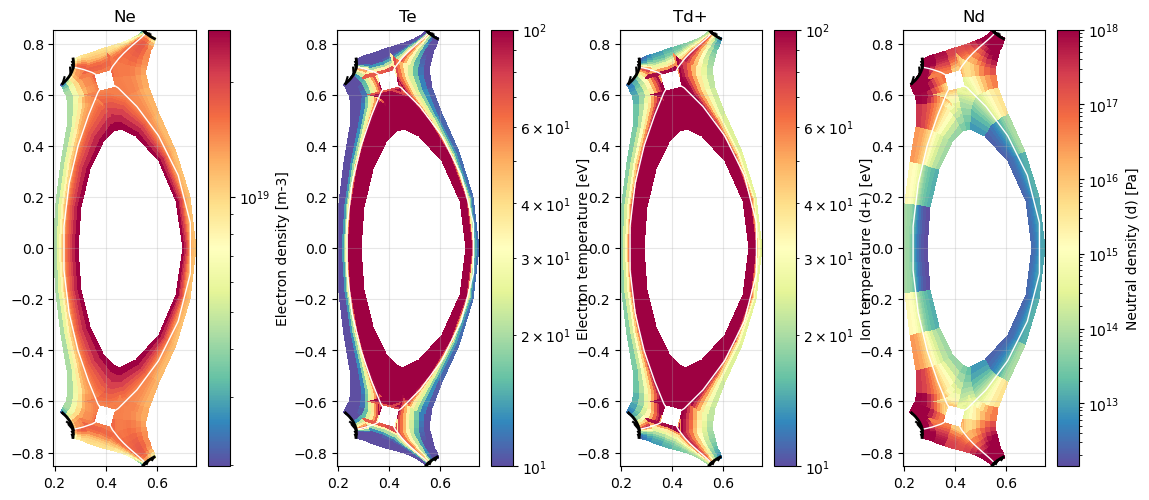

In [59]:
self = Monitor2D(cases[casechoice[-1]], mode = "pcolor", windows = [["Ne", "Te", "Td+", "Nd"]], 
                 settings = {
                    "all":{"view":None, "dpi": 100},
                    "Ne":{"vmin":None, "vmax":None},
                    "Te":{"log":True, "vmin":10, "vmax":100},
                    "Td+":{"log":True, "vmin":10, "vmax":100},
                    "Nd":{"vmin":None, "vmax":1e18},
                    })

## Mesh seam fluctuation

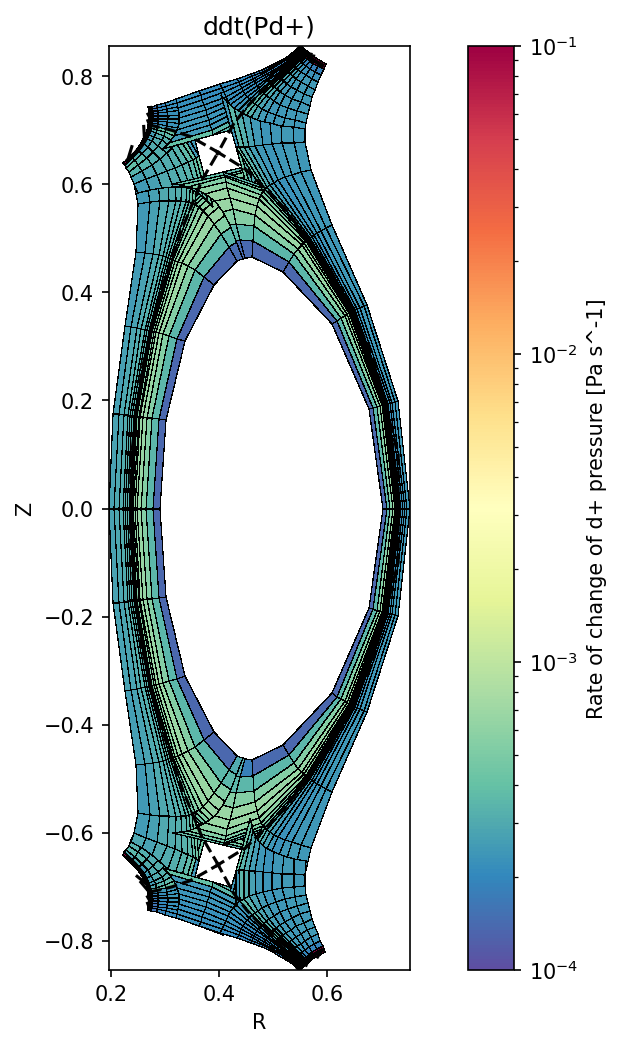

In [140]:
case = cases[casechoice[-1]]

fig, ax = plt.subplots(figsize=(10, 8), dpi = 150)

data = case.ds["ddt(Pd+)"]

rms = np.sqrt((data**2).sum("t") / len(data.coords["t"]))

abs(rms).bout.pcolormesh(ax = ax, cmap = "Spectral_r",  color = "k", lw = 0.1, logscale = True, vmin = 1e-4, vmax = 0.1)

print()

In [130]:
for i, name in enumerate(casechoice):
    case = cases[name]
    data = case.ds["ddt(Pd+)"]

    rms = np.sqrt((data**2).sum("t") / len(data.coords["t"]))
    print(rms.values.max())

3.6837480501777486
3.6837480503565976
3.683748050346955


## Residuals

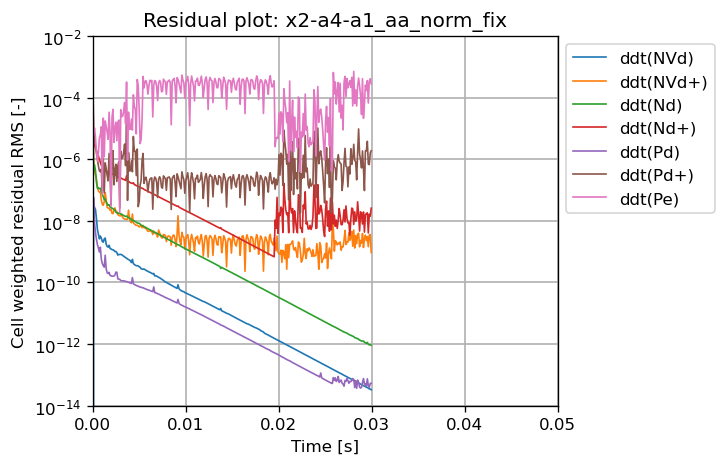

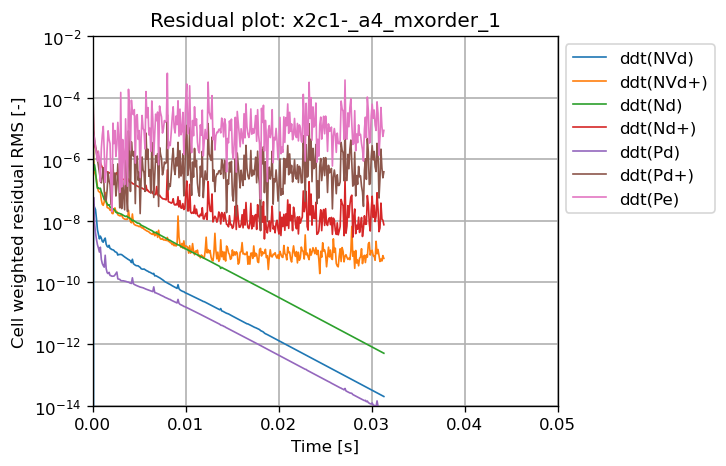

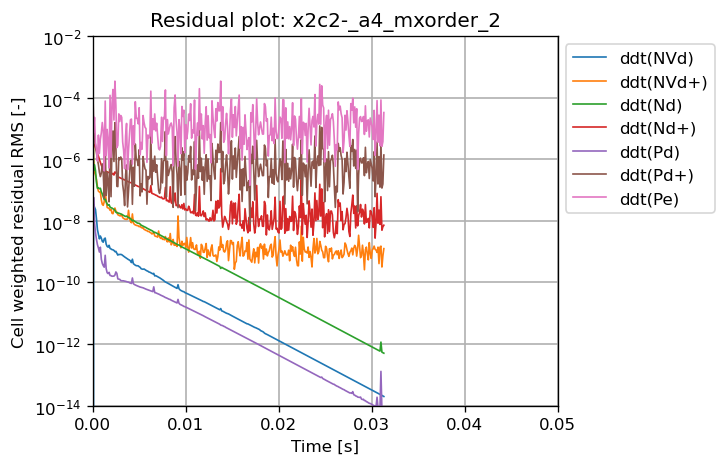

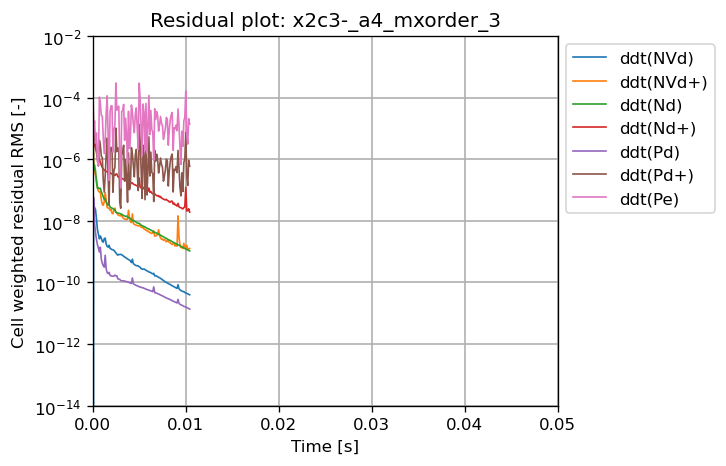

In [211]:
for i, name in enumerate(casechoice):
    case = cases[name]
    plot_ddt(case, ylims = (1e-14, 1e-2), xlims = (0,0.05))

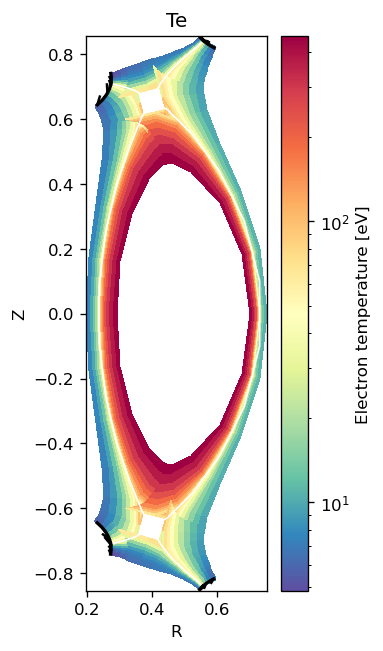

In [30]:
ds = cases["x2-a1-base_500_3e19"].ds

fig, ax = plt.subplots(figsize = (3,6), dpi = 120)
ds["Te"].isel(t=-1).bout.pcolormesh(ax = ax, cmap = "Spectral_r", logscale=True)
print()